In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df=pd.read_csv(r'C:\Users\Aditya\OneDrive\Desktop\Data_Science\telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [134]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [135]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Percentage of Customers Gone For Churn: 26.54%


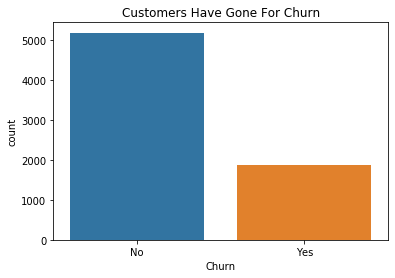

In [136]:
sns.countplot(df['Churn'],data=df)
plt.title("Customers Have Gone For Churn")
print("Percentage of Customers Gone For Churn: {0:.2f}%".format(100*len(df[df['Churn']=='Yes'])/len(df)))
plt.show()

In [137]:
#dff: Data Of Churned Customers, df2: Data of Retained Customers
dff=df[df['Churn']=='Yes']
df2=df[df['Churn']=='No']

<h1 style="color:tomato">Before Churn, Small Analysis</h1>

Male      3555
Female    3488
Name: gender, dtype: int64


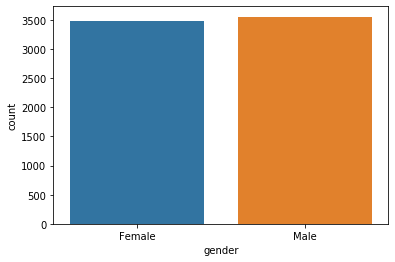

In [138]:
#Gender Distribution
sns.countplot(df['gender'],data=df)
print(df.gender.value_counts())
plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


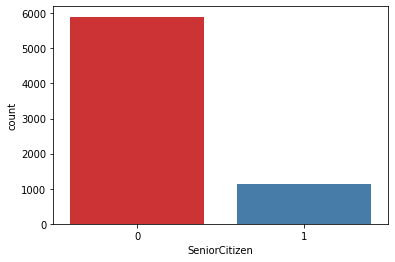

In [139]:
#How Many Senior Citizens???
sns.countplot(df['SeniorCitizen'],data=df,palette="Set1")
print(df.SeniorCitizen.value_counts())
plt.show()

No     3641
Yes    3402
Name: Partner, dtype: int64


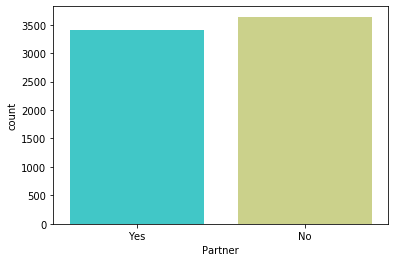

In [140]:
#Partners???
sns.countplot(df['Partner'],palette='rainbow',data=df)
print(df.Partner.value_counts())
plt.show()

Average Tenure: 32 months
Mostly seen tenure: 1 month (613 out of 7043 times)


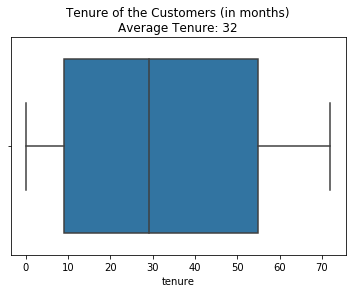

In [141]:
#Tenure??
plot=sns.boxplot('tenure',data=df)
print("Average Tenure: {0} months".format(int(df.tenure.mean())))
print("Mostly seen tenure: {0} month ({1} out of {2} times)".format(int(df.tenure.mode()),df[df.tenure==int(df.tenure.mode())].tenure.count(),df.tenure.count()))
plt.title("Tenure of the Customers (in months)\nAverage Tenure: {0}".format(int(df.tenure.mean())))
plt.show()

<h2 style="color:tomato">Looking at the services offered</h2>

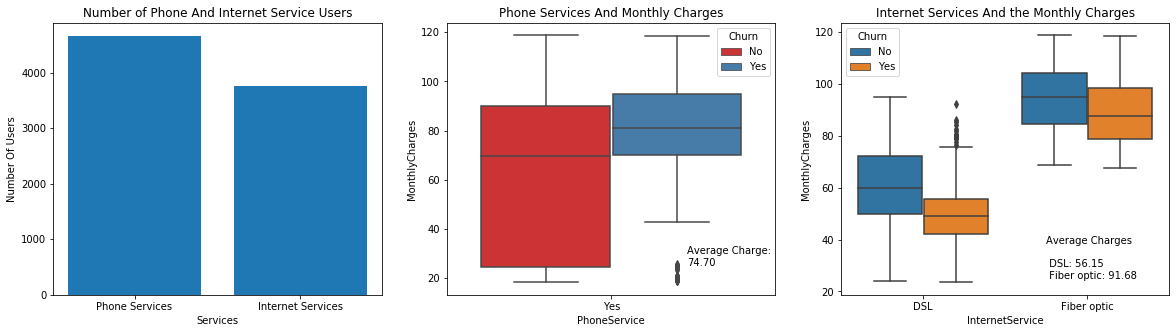

In [142]:
ph_c=df2[df2.PhoneService=='Yes'].PhoneService.count()
inet_c=df2[df2.InternetService!='No'].InternetService.count()
df2['MonthlyCharges'].astype('int')
plt.figure(figsize=(20,5))
plt.subplot(131)
plot=plt.bar(['Phone Services','Internet Services'],[ph_c,inet_c])
plt.xlabel("Services")
plt.ylabel("Number Of Users")
plt.title("Number of Phone And Internet Service Users")
plt.subplot(132)
plot1=sns.boxplot(df[df.PhoneService=='Yes'].PhoneService,'MonthlyCharges',hue="Churn",data=df,palette="Set1")
plt.text(0.23,25,"Average Charge:\n{0:.2f}".format(df[df.PhoneService=='Yes'].MonthlyCharges.median()))
plt.title("Phone Services And Monthly Charges")
plt.subplot(133)
plot2=sns.boxplot(df[df.InternetService!='No'].InternetService,'MonthlyCharges',hue="Churn",data=df)
plt.text(0.75,25,"Average Charges\n\n DSL: {0:.2f}\n Fiber optic: {1:.2f}".format(df[df.InternetService=='DSL'].MonthlyCharges.median(),df[df.InternetService=='Fiber optic'].MonthlyCharges.median()))
plt.title("Internet Services And the Monthly Charges")
plt.show()

<h2 style='color:tomato'>Going Deeper Into Internet Services</h2>

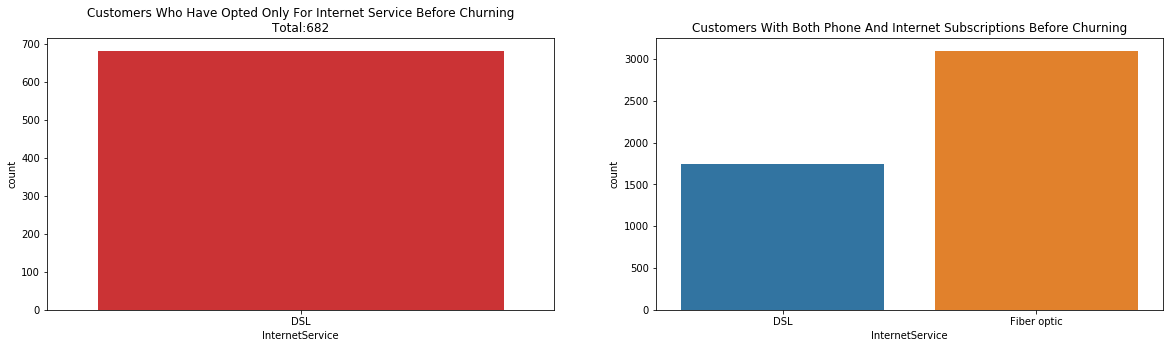

In [143]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plot=sns.countplot(df[df.PhoneService=='No'].InternetService,data=df,palette='Set1')
plt.title("Customers Who Have Opted Only For Internet Service Before Churning\nTotal:{0}".format(df[df.PhoneService=='No'].customerID.count()))
plt.subplot(122)
plot1=sns.countplot(df[(df.InternetService!='No')&(df.PhoneService=='Yes')].InternetService,data=df)
plt.title("Customers With Both Phone And Internet Subscriptions Before Churning")
plt.show()

Streaming TV:
 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

Streaming Movies:
 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


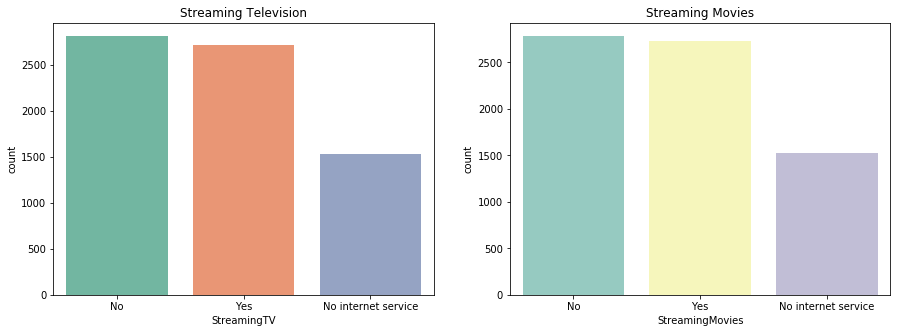

In [144]:
fig=plt.figure(figsize=(15,5))
print("Streaming TV:\n",df.StreamingTV.value_counts())
print("\nStreaming Movies:\n",df.StreamingMovies.value_counts())
plt.subplot(121)
plot=sns.countplot(df["StreamingTV"],palette="Set2",data=df)
plt.title("Streaming Television")
plt.subplot(122)
plot2=sns.countplot(df['StreamingMovies'],palette="Set3",data=df)
plt.title("Streaming Movies")
plt.show()

<h2 style='color:tomato'>Going Deeper Into Phone Services</h2>

Average Monthly Charges(Multiple Lines):
1. Churned Customers: 90.85
2. Retained Customers: 85.5

Average Monthly Charges(No Multiple Lines):
1. Churned Customers: 70.75
2. Retained Customers: 50.35

Yes    6361
No      682
Name: PhoneService, dtype: int64


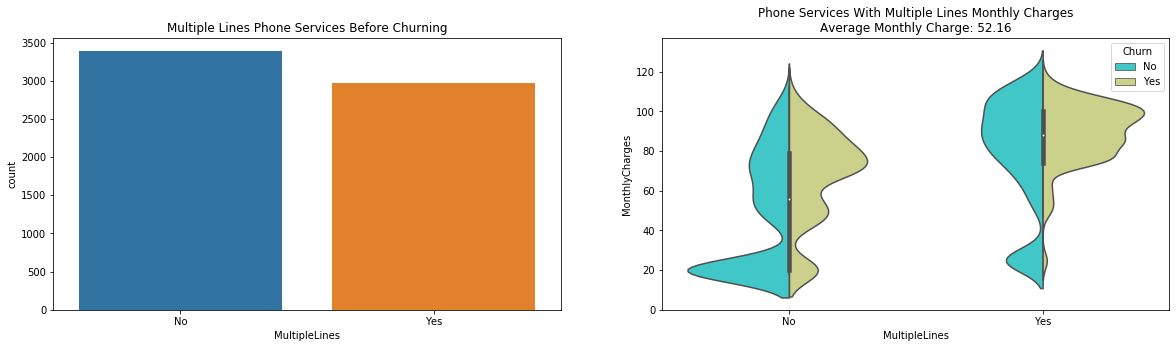

In [145]:
print("Average Monthly Charges(Multiple Lines):\n1. Churned Customers: {0}\n2. Retained Customers: {1}\n".format(dff[dff['MultipleLines']=='Yes'].MonthlyCharges.median(),df2[df2['MultipleLines']=='Yes'].MonthlyCharges.median()))
print("Average Monthly Charges(No Multiple Lines):\n1. Churned Customers: {0}\n2. Retained Customers: {1}\n".format(dff[dff['MultipleLines']=='No'].MonthlyCharges.median(),df2[df2['MultipleLines']=='No'].MonthlyCharges.median()))
print(df.PhoneService.value_counts())
plt.figure(figsize=(20,5))
plt.subplot(121)
plot=sns.countplot(df[df.PhoneService=='Yes'].MultipleLines,data=df)
plt.title("Multiple Lines Phone Services Before Churning")
plt.subplot(122)
plot2=sns.violinplot(df[df.MultipleLines!="No phone service"].MultipleLines,df[df.MultipleLines!="No phone service"].MonthlyCharges,hue="Churn",split=True,data=df,palette="rainbow")
plt.title("Phone Services With Multiple Lines Monthly Charges\nAverage Monthly Charge: {0:.2f}".format(df[df.MultipleLines!="Yes"].MonthlyCharges.mean()))
plt.show()

<h1 style="color:tomato">Analyzing The Churn</h1>

Average Monthly Charges
Customer Who Opted To Churn: 79.65
Not Opted To Churn: 64.43
General Average 70.35


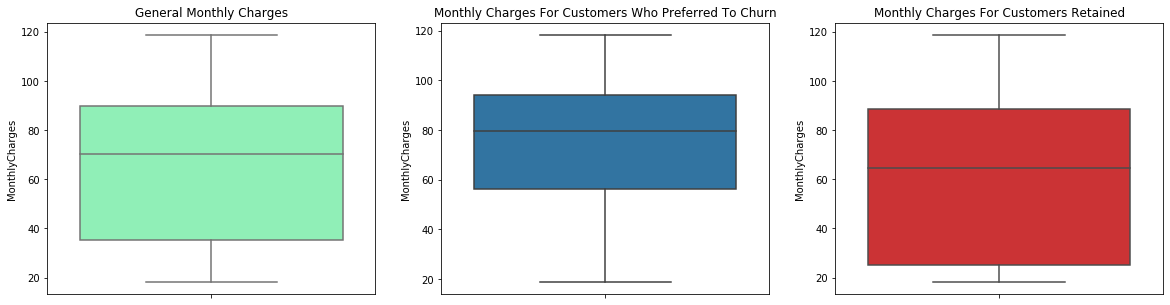

In [146]:
fig=plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(y=df['MonthlyCharges'],data=df,palette="rainbow")
plt.title("General Monthly Charges")
plt.subplot(132)
sns.boxplot(y=dff['MonthlyCharges'],data=dff)
plt.title("Monthly Charges For Customers Who Preferred To Churn")
plt.subplot(133)
sns.boxplot(y=df2['MonthlyCharges'],data=df2,palette='Set1')
plt.title("Monthly Charges For Customers Retained")
print("Average Monthly Charges\nCustomer Who Opted To Churn: {0:.2f}\nNot Opted To Churn: {1:.2f}\nGeneral Average {2:.2f}".format(dff['MonthlyCharges'].median(),df2['MonthlyCharges'].median(),df['MonthlyCharges'].median()))
plt.show()

<h3 style="color:tomato">One Reason For Churn can be high monthly charges paid by the customers</h3>

Percentage Of Males In Churned Customers: 49.76%
Percentage of Females In Churned Customers: 50.24%


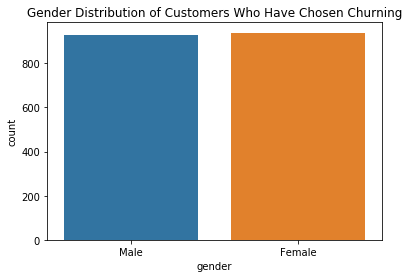

In [147]:
sns.countplot(dff['gender'],data=dff)
ml=len(dff[dff['gender']=='Male'])
fml=len(dff[dff['gender']=='Female'])
print("Percentage Of Males In Churned Customers: {0:.2f}%\nPercentage of Females In Churned Customers: {1:.2f}%".format(100*ml/len(dff),100*fml/len(dff)))
plt.title("Gender Distribution of Customers Who Have Chosen Churning")
plt.show()

<h3 style="color:tomato">There can be seen nearly 50-50 distribution on the basis of gender among the churned customers</h3>

Percentage of Senior Citizens In Churned Customers: 25.47%
Percentage Of Senior Citizens Who Preferred To Churn: 6.76%


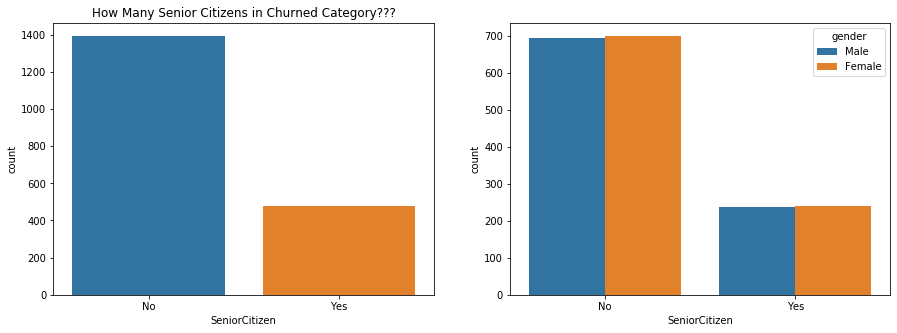

In [148]:
sc=dff['SeniorCitizen'].map({0:'No',1:'Yes'})
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(sc,data=dff)
sn=len(dff[dff['SeniorCitizen']==1])
nsn=len(dff[dff['SeniorCitizen']==0])
print("Percentage of Senior Citizens In Churned Customers: {0:.2f}%".format(100*sn/len(dff)))
print("Percentage Of Senior Citizens Who Preferred To Churn: {0:.2f}%".format(100*sn/len(df)))
plt.title("How Many Senior Citizens in Churned Category???")
plt.subplot(122)
sns.countplot(sc,hue=dff['gender'],data=dff)
plt.show()

<h3 style="color:orange;border:1px solid black;padding:10px">To Know the Estimated Impact Of The Loss in Terms of Our Reputation from the Customer's Perspective, It is important to know how many of churned customers came with partners</h3>

Percentage Of Partners Who Preferred To Churn: 19.66%
Percentage Of Partners Among Senior Citizens Who Preferred Churn: 34.55%
**Among Males: 20.42%
**Among Females: 18.90%


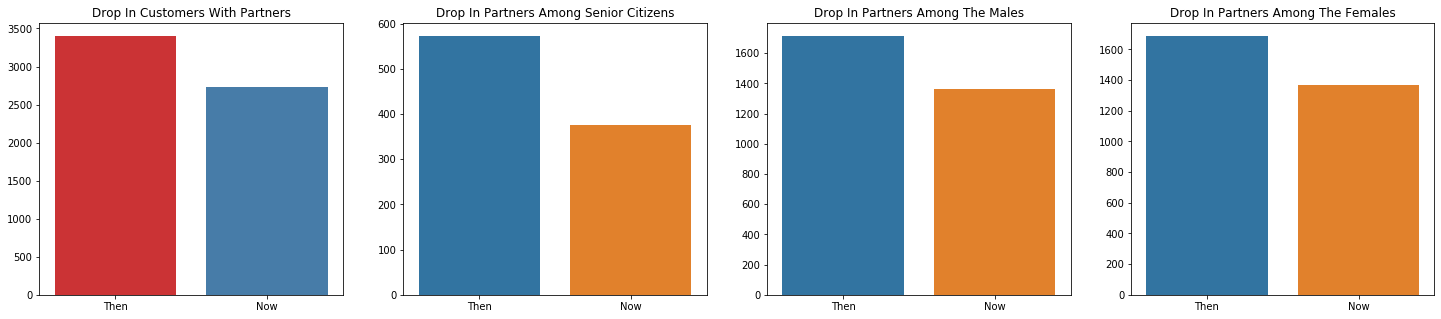

In [149]:
fig=plt.figure(figsize=(25,5))
sc2=dff[dff['SeniorCitizen']==1]
print("Percentage Of Partners Who Preferred To Churn: {0:.2f}%".format(100*len(dff[dff['Partner']=='Yes'])/len(df[df['Partner']=='Yes'])))
print("Percentage Of Partners Among Senior Citizens Who Preferred Churn: {0:.2f}%".format(100*(len(dff[(dff['Partner']=='Yes')&(dff['SeniorCitizen']==1)])/len(df[(df['SeniorCitizen']==1)&(df['Partner']=='Yes')]))))
print("**Among Males: {0:.2f}%\n**Among Females: {1:.2f}%".format(100*len(dff[(dff['gender']=='Male')&(dff['Partner']=='Yes')])/len(df[(df['gender']=='Male')&(df['Partner']=='Yes')]),100*len(dff[(dff['gender']=='Female')&(dff['Partner']=='Yes')])/len(df[(df['gender']=='Female')&(df['Partner']=='Yes')])))
ml=dff[dff['gender']=='Male']
fml=dff[dff['gender']=='Female']
plt.subplot(141)
sns.barplot(['Then','Now'],[len(df[df['Partner']=='Yes']),len(df2[df2['Partner']=='Yes'])],palette="Set1")
plt.title("Drop In Customers With Partners")
plt.subplot(142)
sns.barplot(['Then','Now'],[len(df[(df['SeniorCitizen']==1)&(df['Partner']=='Yes')]),len(df2[(df2['SeniorCitizen']==1)&(df2['Partner']=='Yes')])])
plt.title("Drop In Partners Among Senior Citizens")
plt.subplot(143)
sns.barplot(['Then','Now'],[len(df[(df['gender']=='Male')&(df['Partner']=='Yes')]),len(df2[(df2['gender']=='Male')&(df2['Partner']=='Yes')])])
plt.title("Drop In Partners Among The Males")
plt.subplot(144)
sns.barplot(['Then','Now'],[len(df[(df['gender']=='Female')&(df['Partner']=='Yes')]),len(df2[(df2['gender']=='Female')&(df2['Partner']=='Yes')])])
plt.title("Drop In Partners Among The Females")
plt.show()

<h3 style="color:tomato;border: 1px solid black;padding:15px">To Know More About The Loss, It Is Better To Check What Are The Services That Have Been Dropped by The Customers.<br><br>Also, It Will Be Helpful To Try And Build A Relation Between Different Services And The Monthly Charges To Get A More Vivid Picture Of The Losses</h3>

In [150]:
dff_services=dff.iloc[:,6:9]
dff_services['MonthlyCharges']=dff['MonthlyCharges']
dff_services.head()

,PhoneService,MultipleLines,InternetService,MonthlyCharges
2,Yes,No,DSL,53.85
4,Yes,No,Fiber optic,70.70
5,Yes,Yes,Fiber optic,99.65
8,Yes,Yes,Fiber optic,104.80
13,Yes,Yes,Fiber optic,103.70


In [151]:
df2_services=df2.iloc[:,6:9]
df2_services['MonthlyCharges']=df2['MonthlyCharges']
df_services=df.iloc[:,6:9]
df_services['MonthlyCharges']=df['MonthlyCharges']

Phone Services
-------------
Impact: 26.71%
Average Loss Per Service(in Currency): 80.95
Estimated Loss (in Currency): 137534.05

Internet Services
-----------------
Impact: 31.83%
Average Loss Per Service(in Currency): 80.45
Estimated Loss (in Currency): 141270.20


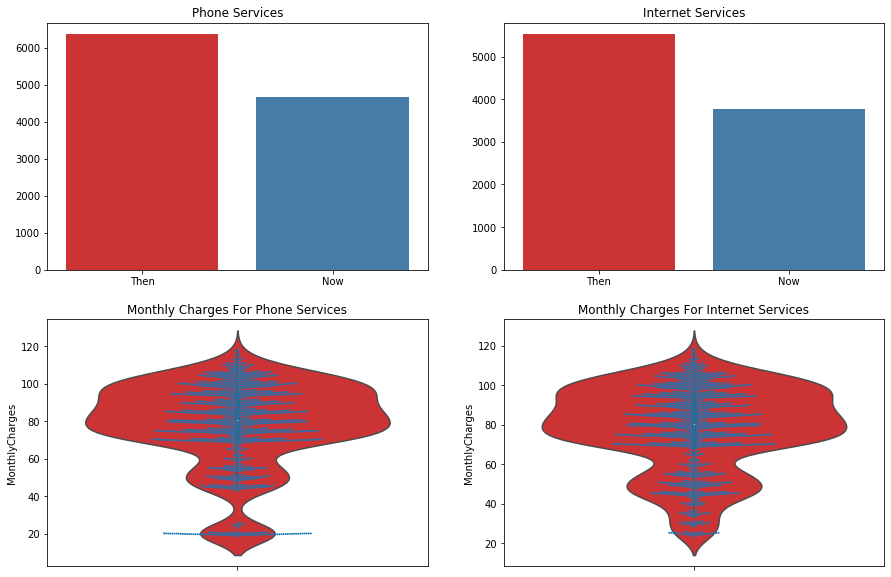

In [152]:
ph=dff_services[dff_services['PhoneService']=='Yes']
it=dff_services[dff_services['InternetService']!='No']
ph_then=len(df_services[df_services['PhoneService']=='Yes'])
ph_now=len(df2_services[df2_services['PhoneService']=='Yes'])
it_then=len(df_services[df_services['InternetService']!='No'])
it_now=len(df2_services[df2_services['InternetService']!='No'])
ph_lost=100*len(ph)/len(df_services[df_services['PhoneService']=='Yes'])
it_lost=100*len(it)/len(df[df['InternetService']!='No'])
av_ph=ph['MonthlyCharges'].median()
av_it=it['MonthlyCharges'].median()
print("Phone Services\n-------------\nImpact: {0:.2f}%\nAverage Loss Per Service(in Currency): {1:.2f}\nEstimated Loss (in Currency): {2:.2f}".format(ph_lost,av_ph,av_ph*ph_lost*(ph_then)/100))
print("\nInternet Services\n-----------------\nImpact: {0:.2f}%\nAverage Loss Per Service(in Currency): {1:.2f}\nEstimated Loss (in Currency): {2:.2f}".format(it_lost,av_it,av_it*it_lost*(it_then)/100))
fig=plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(["Then","Now"],[ph_then,ph_now],palette='Set1')
plt.title("Phone Services")
plt.subplot(222)
sns.barplot(["Then","Now"],[it_then,it_now],palette='Set1')
plt.title("Internet Services")
plt.subplot(223)
sns.violinplot(y=ph['MonthlyCharges'],data=dff_services,palette='Set1')
sns.swarmplot(y=ph['MonthlyCharges'],data=dff_services,size=2)
plt.title("Monthly Charges For Phone Services")
plt.subplot(224)
sns.violinplot(y=it['MonthlyCharges'],data=dff_services,palette="Set1")
sns.swarmplot(y=it['MonthlyCharges'],data=dff_services,size=2)
plt.title("Monthly Charges For Internet Services")
plt.show()

Percentage Of Customers Who Used Multiple Lines Phone Services Before Churning: 42.18%
Percentage Of Non-Churned Customers Who Are Currently Using Multiple Lines Phone Services: 40.99%

Impact: 28.61%
Average Loss Per Service (in Currency): 90.85
Estimated Loss (in Currency): 77222.50


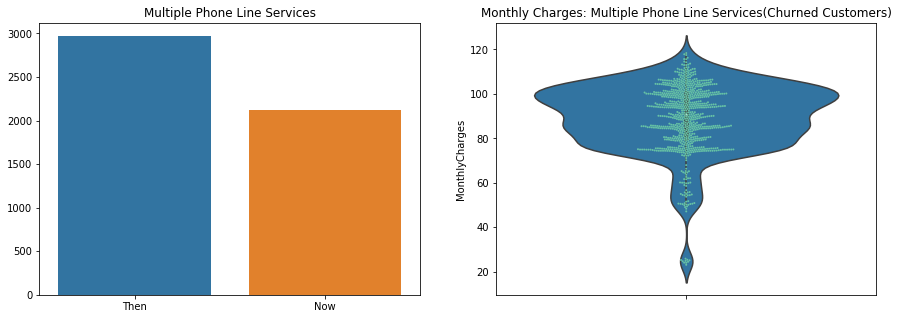

In [153]:
fig=plt.figure(figsize=(15,5))
mul_now=df2_services[df2_services['MultipleLines']=='Yes']
mul_then=df_services[df_services['MultipleLines']=='Yes']
mul1=dff_services[dff_services['MultipleLines']=='Yes']
mult_drop=100*len(mul1)/len(mul_then)
mult_bef_chur=100*len(df_services[df_services['MultipleLines']=='Yes'])/len(df_services)
mult_aft_chur=100*len(df2_services[df2_services['MultipleLines']=='Yes'])/len(df2_services)
av_ch_mult=mul1['MonthlyCharges'].median()
plt.subplot(121)
sns.barplot(["Then","Now"],[len(mul_then),len(mul_now)])
plt.title("Multiple Phone Line Services")
mul=dff_services[dff_services['MultipleLines']!='No phone service']
print("Percentage Of Customers Who Used Multiple Lines Phone Services Before Churning: {0:.2f}%\nPercentage Of Non-Churned Customers Who Are Currently Using Multiple Lines Phone Services: {1:.2f}%".format(mult_bef_chur,mult_aft_chur))
print("\nImpact: {0:.2f}%".format(mult_drop))
plt.subplot(122)
sns.violinplot(y=mul1['MonthlyCharges'],data=dff_services)
sns.swarmplot(y=mul1['MonthlyCharges'],data=dff_services,palette='Set2',size=2)
plt.title("Monthly Charges: Multiple Phone Line Services(Churned Customers)")
print("Average Loss Per Service (in Currency): {0:.2f}".format(av_ch_mult))
print("Estimated Loss (in Currency): {0:.2f}".format(av_ch_mult*mult_drop*len(mul_then)/100)) #Average Charge*Percentage Dropped*OriginalSize  
plt.show()

DSL Services
------------
Drop: 18.96%
Average Monthly Charges(in Currency): 49.25
Estimated Loss (in Currency): 22605.75

Fiber Optic Services
--------------------
Drop: 41.89%
Average Monthly Charges(in Currency): 87.55
Estimated Loss (in Currency): 113552.35


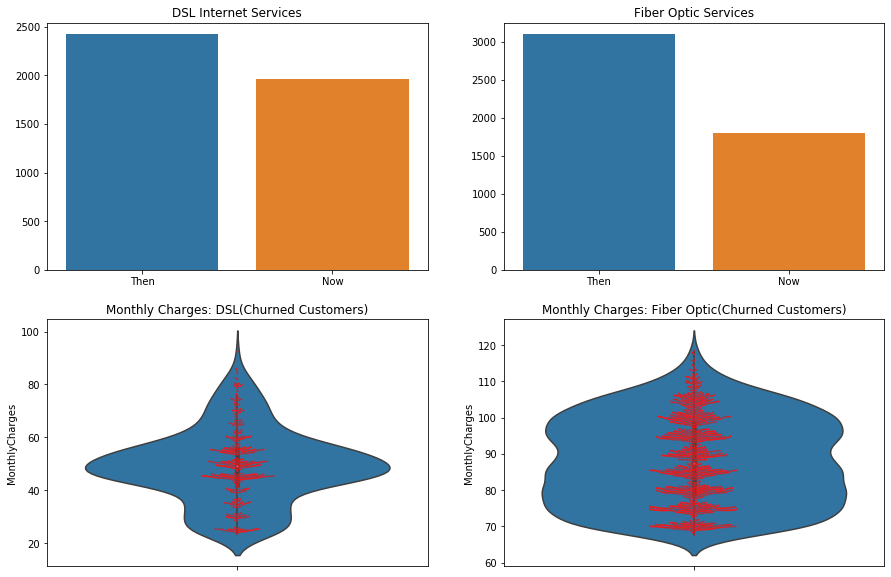

In [154]:
dsl_then=df_services[df_services['InternetService']=='DSL']
dsl_now=df2_services[df2_services['InternetService']=='DSL']
fo_then=df_services[df_services['InternetService']=='Fiber optic']
fo_now=df2_services[df2_services['InternetService']=='Fiber optic']
dsl_lost=dff_services[dff_services['InternetService']=='DSL']
fo_lost=dff_services[dff_services['InternetService']=='Fiber optic']
dsl_losper=100*(len(dsl_then)-len(dsl_now))/len(dsl_then)
fo_losper=100*(len(fo_then)-len(fo_now))/len(fo_then)
dsl_av=dsl_lost['MonthlyCharges'].median()
fo_av=fo_lost['MonthlyCharges'].median()
print("DSL Services\n------------\nDrop: {0:.2f}%\nAverage Monthly Charges(in Currency): {1:.2f}\nEstimated Loss (in Currency): {2:.2f}".format(dsl_losper,dsl_av,dsl_av*dsl_losper*len(dsl_then)/100))
print("\nFiber Optic Services\n--------------------\nDrop: {0:.2f}%\nAverage Monthly Charges(in Currency): {1:.2f}\nEstimated Loss (in Currency): {2:.2f}".format(fo_losper,fo_av,fo_av*fo_losper*len(fo_then)/100))
fig=plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(['Then','Now'],[len(dsl_then),len(dsl_now)])
plt.title("DSL Internet Services")
plt.subplot(222)
sns.barplot(['Then','Now'],[len(fo_then),len(fo_now)])
plt.title("Fiber Optic Services")
plt.subplot(223)
sns.violinplot(y=dsl_lost['MonthlyCharges'],data=dff_services)
sns.swarmplot(y=dsl_lost['MonthlyCharges'],data=dff_services,palette='Set1',size=2)
plt.title("Monthly Charges: DSL(Churned Customers)")
plt.subplot(224)
sns.violinplot(y=fo_lost['MonthlyCharges'],data=dff_services)
sns.swarmplot(y=fo_lost['MonthlyCharges'],data=dff_services,palette='Set1',size=2)
plt.title("Monthly Charges: Fiber Optic(Churned Customers)")
plt.show()

In [155]:
dff_services.head()

,PhoneService,MultipleLines,InternetService,MonthlyCharges
2,Yes,No,DSL,53.85
4,Yes,No,Fiber optic,70.70
5,Yes,Yes,Fiber optic,99.65
8,Yes,Yes,Fiber optic,104.80
13,Yes,Yes,Fiber optic,103.70


In [156]:
dff_service_ph_mapped=dff_services['PhoneService'].map({'Yes':1,'No':0})
dff_service_mult_mapped=dff_services['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})
dff_service_int_mapped=dff_services['InternetService'].map({'DSL':0,'Fiber optic':1,'No':2})
dff_services_mapped=pd.DataFrame({'PhoneServices':dff_service_ph_mapped,'MultipleLines':dff_service_mult_mapped,'InternetServices':dff_service_int_mapped,'MonthlyCharges':dff_services['MonthlyCharges']})
dff_services_mapped.head()

,PhoneServices,MultipleLines,InternetServices,MonthlyCharges
2,1,0,0,53.85
4,1,0,1,70.70
5,1,1,1,99.65
8,1,1,1,104.80
13,1,1,1,103.70


In [157]:
services={}
for w,x,y,z in zip(dff_services_mapped['PhoneServices'],dff_services_mapped['MultipleLines'],dff_services_mapped['InternetServices'],dff_services_mapped['MonthlyCharges']):
    a=str(w)+str(x)+str(y)
    if a not in services:
        services[a]=[z]
    else:
        services[a].append(z)
for x in (services.keys()):
    services[x]=np.array(services[x]).mean()
services

{'100': 53.328240740740746,
 '101': 82.01188679245284,
 '111': 92.35169491525424,
 '020': 37.53382352941176,
 '102': 19.945631067961163,
 '110': 63.41849315068493,
 '112': 24.720000000000002}

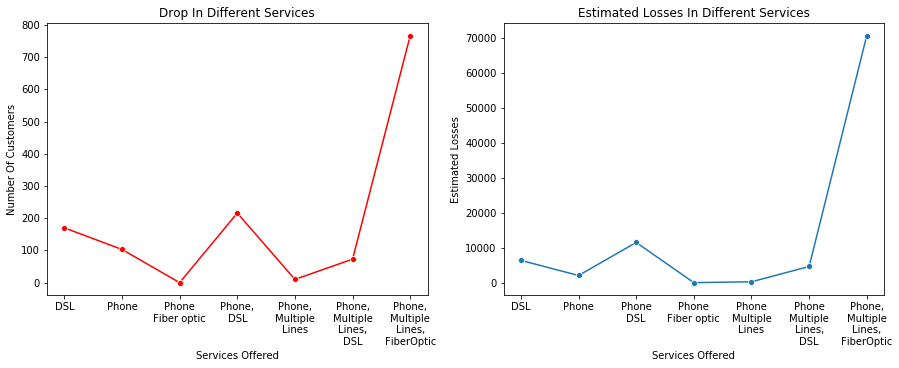

In [159]:
drop_dsl=dff_services_mapped[(dff_services_mapped['PhoneServices']==0)&(dff_services_mapped['MultipleLines']==2)&(dff_services_mapped['InternetServices']==0)]
drop_phone=dff_services_mapped[(dff_services_mapped['PhoneServices']==1)&(dff_services_mapped['MultipleLines']==0)&(dff_services_mapped['InternetServices']==2)]
drop_phone_fo=dff_services_mapped[(dff_services_mapped['PhoneServices']==0)&(dff_services_mapped['MultipleLines']==2)&(dff_services_mapped['InternetServices']==1)]
drop_dsl_phone=dff_services_mapped[(dff_services_mapped['PhoneServices']==1)&(dff_services_mapped['MultipleLines']==0)&(dff_services_mapped['InternetServices']==0)]
drop_phone_multiplelines=dff_services_mapped[(dff_services_mapped['PhoneServices']==1)&(dff_services_mapped['MultipleLines']==1)&(dff_services_mapped['InternetServices']==2)]
drop_phone_multiplelines_dsl=dff_services_mapped[(dff_services_mapped['PhoneServices']==1)&(dff_services_mapped['MultipleLines']==1)&(dff_services_mapped['InternetServices']==0)]
drop_phone_multiplelines_fo=dff_services_mapped[(dff_services_mapped['PhoneServices']==1)&(dff_services_mapped['MultipleLines']==1)&(dff_services_mapped['InternetServices']==1)]
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
sns.lineplot(['Phone,\nDSL','Phone\nFiber optic','Phone,\nMultiple\nLines,\nFiberOptic','Phone','Phone,\nMultiple\nLines,\nDSL','Phone,\nMultiple\nLines','DSL'],[len(drop_dsl_phone),len(drop_phone_fo),len(drop_phone_multiplelines_fo),len(drop_phone),len(drop_phone_multiplelines_dsl),len(drop_phone_multiplelines),len(drop_dsl)],marker='o',c='r')
plt.ylabel("Number Of Customers")
plt.xlabel("Services Offered")
plt.title("Drop In Different Services")
plt.subplot(122)
plt.ylabel("Estimated Losses")
plt.xlabel("Services Offered")
sns.lineplot(['DSL','Phone','Phone\nFiber optic','Phone\nDSL','Phone\nMultiple\nLines','Phone\nMultiple\nLines,\nDSL','Phone,\nMultiple\nLines,\nFiberOptic'],[len(drop_dsl)*services['020'],len(drop_phone)*services['102'],len(drop_phone_fo)*services['101'],len(drop_dsl_phone)*services['100'],len(drop_phone_multiplelines)*services['112'],len(drop_phone_multiplelines_dsl)*services['110'],len(drop_phone_multiplelines_fo)*services['111']],marker='o')
plt.title("Estimated Losses In Different Services")
plt.show()

<p style="color:tomato;border:1px solid black;padding:20px">Losses In Phone,Multiple Lines And FiberOptic Services Offered together is massive. We also see maximum drop in the customers availing this facility. Looking at the dictionary 'services' that maps services to thir respective average monthly charges, we can see that monthly charges for this combo service offer stands at nearly 100 which is the maximum and maybe also the reason for area of maximum drop and loss.</p>

Before Churning
Ratio- No Security:Atleast One Security: 0.45991

After Churning
Ratio- No Security:Atleast One Security: 0.28056

Drop In: Online Securities: 14.61%		Device Protection: 22.50%		Tech Support: 15.17%


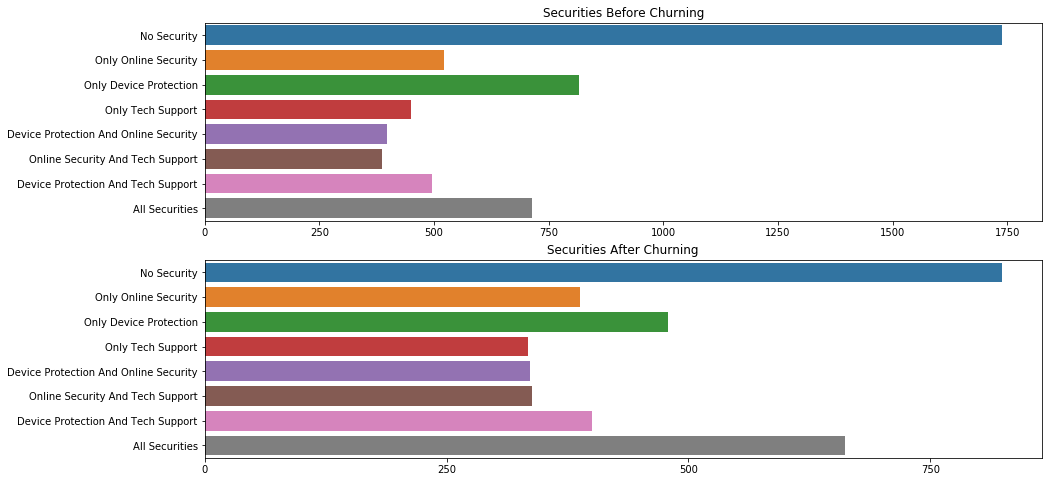

In [160]:
fig=plt.figure(figsize=(15,8))
plt.subplot(211)
only_onsec=df[(df['OnlineSecurity']=='Yes')&(df['DeviceProtection']=='No')&(df['TechSupport']=='No')]
only_devpro=df[(df['OnlineSecurity']=='No')&(df['DeviceProtection']=='Yes')&(df['TechSupport']=='No')]
only_techsup=df[(df['OnlineSecurity']=='No')&(df['DeviceProtection']=='No')&(df['TechSupport']=='Yes')]
onsec_devpro=df[(df['OnlineSecurity']=='Yes')&(df['DeviceProtection']=='Yes')&(df['TechSupport']=='No')]
onsec_techsup=df[(df['OnlineSecurity']=='Yes')&(df['DeviceProtection']=='No')&(df['TechSupport']=='Yes')]
devpro_techsup=df[(df['OnlineSecurity']=='No')&(df['DeviceProtection']=='Yes')&(df['TechSupport']=='Yes')]
al=df[(df['OnlineSecurity']=='Yes')&(df['DeviceProtection']=='Yes')&(df['TechSupport']=='Yes')]
atleast=df[(df['OnlineSecurity']=='Yes')|(df['DeviceProtection']=='Yes')|(df['TechSupport']=='Yes')]
none=df[(df['OnlineSecurity']=='No')&(df['DeviceProtection']=='No')&(df['TechSupport']=='No')]
sns.barplot([len(none),len(only_onsec),len(only_devpro),len(only_techsup),len(onsec_devpro),len(onsec_techsup),len(devpro_techsup),len(al)],['No Security','Only Online Security','Only Device Protection','Only Tech Support','Device Protection And Online Security','Online Security And Tech Support','Device Protection And Tech Support','All Securities'])
print("Before Churning\nRatio- No Security:Atleast One Security: {0:.5f}".format(len(none)/len(atleast)))
plt.title("Securities Before Churning")
plt.subplot(212)
only_onsec=df2[(df2['OnlineSecurity']=='Yes')&(df2['DeviceProtection']=='No')&(df2['TechSupport']=='No')]
only_devpro=df2[(df2['OnlineSecurity']=='No')&(df2['DeviceProtection']=='Yes')&(df2['TechSupport']=='No')]
only_techsup=df2[(df2['OnlineSecurity']=='No')&(df2['DeviceProtection']=='No')&(df2['TechSupport']=='Yes')]
onsec_devpro=df2[(df2['OnlineSecurity']=='Yes')&(df2['DeviceProtection']=='Yes')&(df2['TechSupport']=='No')]
onsec_techsup=df2[(df2['OnlineSecurity']=='Yes')&(df2['DeviceProtection']=='No')&(df2['TechSupport']=='Yes')]
devpro_techsup=df2[(df2['OnlineSecurity']=='No')&(df2['DeviceProtection']=='Yes')&(df2['TechSupport']=='Yes')]
al=df2[(df2['OnlineSecurity']=='Yes')&(df2['DeviceProtection']=='Yes')&(df2['TechSupport']=='Yes')]
atleast=df2[(df2['OnlineSecurity']=='Yes')|(df2['DeviceProtection']=='Yes')|(df2['TechSupport']=='Yes')]
none=df2[(df2['OnlineSecurity']=='No')&(df2['DeviceProtection']=='No')&(df2['TechSupport']=='No')]
plt.xticks([0,250,500,750,1000,1250,1500,1750])
sns.barplot([len(none),len(only_onsec),len(only_devpro),len(only_techsup),len(onsec_devpro),len(onsec_techsup),len(devpro_techsup),len(al)],['No Security','Only Online Security','Only Device Protection','Only Tech Support','Device Protection And Online Security','Online Security And Tech Support','Device Protection And Tech Support','All Securities'])
print("\nAfter Churning\nRatio- No Security:Atleast One Security: {0:.5f}".format(len(none)/len(atleast)))
plt.title("Securities After Churning")
print("\nDrop In: Online Securities: {0:.2f}%\t\tDevice Protection: {1:.2f}%\t\tTech Support: {2:.2f}%".format(100*len(dff[dff['OnlineSecurity']=='Yes'])/len(df[df['OnlineSecurity']=='Yes']),100*len(dff[dff['DeviceProtection']=='Yes'])/len(df[df['DeviceProtection']=='Yes']),100*len(dff[dff['TechSupport']=='Yes'])/len(df[df['TechSupport']=='Yes'])))
plt.show()

<h3 style="color:tomato">Securities given are high likely to come out as the factor responsible for customers not trusting our services and planning to discontinue availing the services we offer them. Improving on this can retain us more and more customers.</h3>

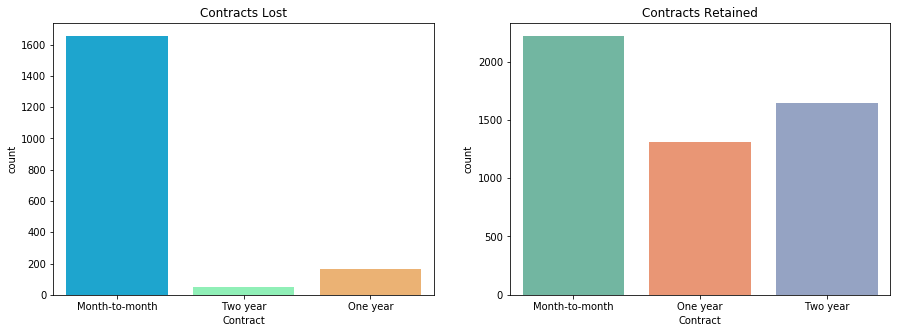

In [161]:
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dff['Contract'],data=dff,palette='rainbow')
plt.title("Contracts Lost")

plt.subplot(122)
sns.countplot(df2['Contract'],data=df2,palette='Set2')
plt.title("Contracts Retained")
plt.show()

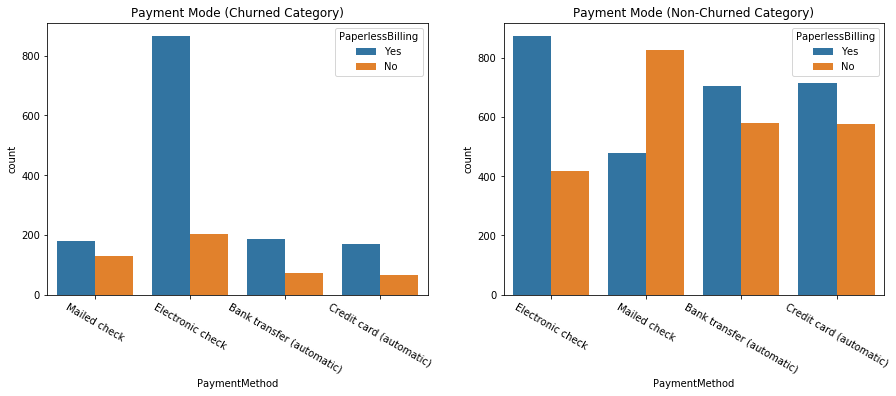

In [162]:
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dff['PaymentMethod'],hue=dff['PaperlessBilling'],data=dff)
plt.title("Payment Mode (Churned Category)")
plt.xticks(rotation=-30)

plt.subplot(122)
sns.countplot(df2['PaymentMethod'],hue=df2['PaperlessBilling'],data=df2)
plt.title("Payment Mode (Non-Churned Category)")
plt.xticks(rotation=-30)
plt.show()